# Producto Integrador de Aprendizaje <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

031 A2023 Estadística 

Dr. Álvaro Eduardo Cordero Franco

Ismael Sandoval Aguilar 

26 de noviembre de 2023

### Situación problema

Narula and Wellington (1977) dan datos sobre precio de ventas de 28 casas en Erie, Pensilvania, a inicios de 1970, en donde agrega 11 posibles variables predictoras. Accese a los datos a través de la librería `HH`, `data("hpErie")`. Las variables son:

| Variable | Description                                    |
|----------|------------------------------------------------|
| price    | price in $100's                                |
| taxes    | taxes in dollars                               |
| bathrm   | number of bathrooms                            |
| lotsize  | lot size in square feet                        |
| sqfeet   | square footage of living space                 |
| garage   | number of cars for which there is garage space |
| rooms    | number of romos                                |
| bedrm    | number of bedrooms                             |
| age      | age in years                                   |
| type     | type of house                                  |
| style    | "2 story, 1.5 story, ranch"                   |
| fireplac | number of fireplaces                           |


Código para acceder a los datos:

In [18]:
# Libreria para cargar los datos
library("HH")

In [62]:
df <- as.data.frame(hpErie)
head(data)

,price,taxes,bathrm,lotsize,sqfeet,garage,rooms,bedrm,age,type,style,fireplac
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<int>
1,259,492,1,3472,998,1,7,4,42,alum&frame,2.story,0
2,295,502,1,3531,1500,2,7,4,62,brick,2.story,0
3,279,454,1,2275,1175,1,6,3,40,brick&frame,2.story,0
4,259,456,1,4050,1232,1,6,3,54,frame,2.story,0
5,299,506,1,4455,1121,1,6,3,42,alum&frame,2.story,0
6,299,389,1,4455,988,1,6,3,56,brick&frame,2.story,0


1.	Realice un ANOVA para comparar los promedios de los precios de las casas, bajo el factor `fireplac`.

In [97]:
# Libreria para el anova
library(tidyverse)

In [99]:
# Creacion del anova y resultados
anova <- aov(data$price ~ data$fireplac, data = df)
summary(anova)

              Df Sum Sq Mean Sq F value  Pr(>F)   
data$fireplac  1 129951  129951   8.217 0.00812 **
Residuals     26 411168   15814                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

2.	Realice una regresión lineal de la variable precio contra 4 variables predictoras aleatorias, seguido de un Stepwise bajo el siguiente esquema (esto garantizará que no tengan el mismo modelo)

- Seleccione 4 variables al azar con la función “sample(11, 4)”. Los índices generados serán los de las variables a utilizar.

In [155]:
# Semilla arbitraria para replicabilidad
set.seed(100)

# Seleccion aleatoria sin tomar la variable dependiente
index_vec <- sample(seq(2, 12, by = 1), 4)

- Utilice la función `lm` para realizar una regresión lineal múltiple con las 4 variables del primer inciso y concluya en forma estadística.

In [144]:
# Crea la formula como cadena y aplica sapply
predictors <- sapply(index_vec, function(i) paste0("unlist(df[", i, "])"))
formula_str <- paste("data$price ~", paste(predictors, collapse = " + "))

# Crea el modelo lineal inicial
initial_lm <- lm(as.formula(formula_str), data = df)

In [95]:
# Libreria para el modelo Stepwise
library(MASS)

In [151]:
# Modelo de regresion Stepwise y resultados
step_model <- stepAIC(initial_lm, direction = "both",
                      trace = FALSE)
summary(step_model)


Call:
lm(formula = data$price ~ unlist(df[7]) + unlist(df[9]), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-148.50  -41.37  -17.51   50.53  167.94 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -141.986     99.347  -1.429  0.16533    
unlist(df[7])   95.565     13.436   7.113 1.87e-07 ***
unlist(df[9])   -3.157      1.125  -2.808  0.00954 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.73 on 25 degrees of freedom
Multiple R-squared:  0.6989,	Adjusted R-squared:  0.6748 
F-statistic: 29.01 on 2 and 25 DF,  p-value: 3.047e-07


De acuerdo a los resultados anteriores, el modelo de regresión lineal es el siguiente:

$Y = -141.986 + 95.565X_1 - 3.157X_2$

con un $R^2$ ajustada de $0.674$, es decir, el $67\%$ de la varianza de la variable dependiente puede ser explicada mediante las variables incluidas en el modelo. Además, nótese que se rechazan las hipótesis nulas de $X_1$ y $X_2$ (con un nivel de significancia $\alpha=0.05$), por lo que existe evidencia suficiente para concluir que las variables `room` y `age` tienen un efecto significativo en el modelo.

- Haga una matriz de correlación entre la variable `price` contra las 4 variables del inciso primer inciso.

In [154]:
# Nombres de las columnas seleccionadas y tipo
paste(names(df[index_vec]), index_vec)
summary(df[index_vec])

[1] "style 11" "bedrm 8"  "rooms 7"  "age 9"

       style        bedrm           rooms             age       
 2.story  :24   Min.   :2.000   Min.   : 5.000   Min.   : 3.00  
 1.5.story: 2   1st Qu.:3.000   1st Qu.: 6.000   1st Qu.:30.00  
 ranch    : 2   Median :3.000   Median : 6.000   Median :36.00  
                Mean   :3.286   Mean   : 6.679   Mean   :36.32  
                3rd Qu.:4.000   3rd Qu.: 7.000   3rd Qu.:46.50  
                Max.   :5.000   Max.   :10.000   Max.   :62.00  

In [141]:
# Conversion de las variables categoricas a dummy
df_dummy <- model.matrix(~ style - 1, data = df)
df <- cbind(df, df_dummy)

In [142]:
# Matriz de correlacion
selected_vars <- c("price", "age", "bedrm", "rooms", colnames(df_dummy))
corr_matrix <- cor(df[selected_vars], use = "complete.obs")

In [143]:
# Librerias para graficar
library(ggplot2)
library(corrplot)

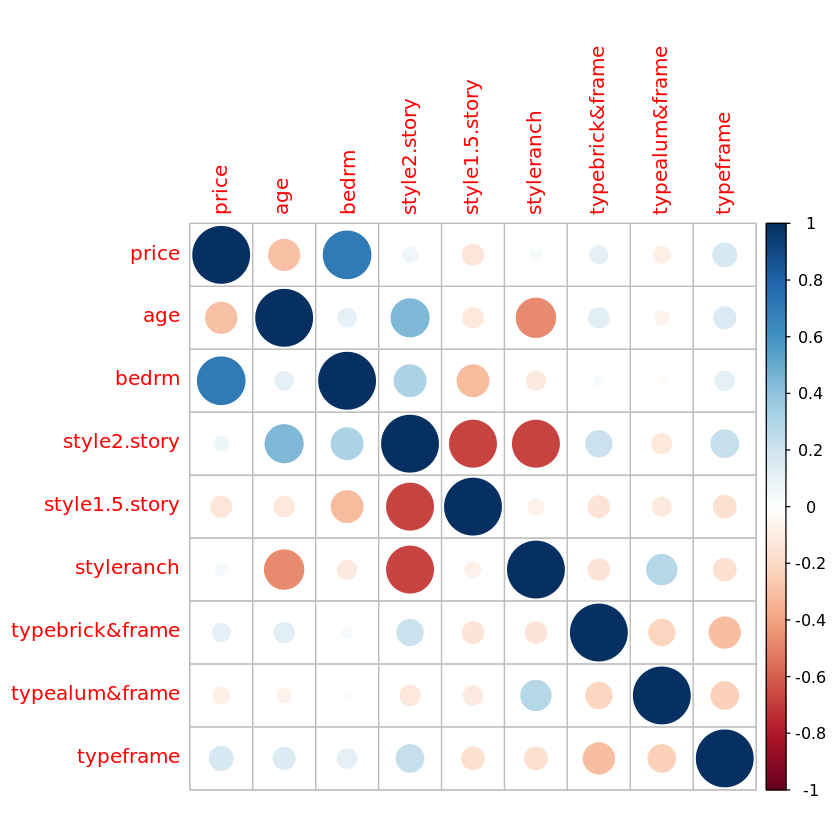

In [126]:
# Grafica
corrplot(corr_matrix, method = "circle")

-	Si la variable “sqfeetsq” fue seleccionada en el primer inciso, agregue una columna con el cuadrado de dicha variable y vuelva a realizar la regresión. Si no fue seleccionada, agréguela junto con su cuadrado. ¿Cómo cambian los resultados?